<img src="http://sonetodigital.com.br/adm/wp-content/uploads/2018/12/logo-fiap.png" width="150" align="left"/>

<br/><br/>

<font size=5 color="#ed145b"><b> Sistemas para internet </b></font><font size=5 color="#ed145b"> - Inteligência Artificial e Machine Learning </font>

<font size=4 color="#ed145b">Verstand application for DISRUPT21 at FIAP</font>

<font size=5 ><b>Grupo:</b></font>


<b>Abraão Azevedo Oliveira Silva - RM:83983</b> <br/>
<b>Rodrigo Sussumu Tanaka - RM:83888</b> <br/>
<b>Geovanne Amorim Coelho - Rm82578</b> <br/>
<b>Iago Monteiro Garcia - RM82448</b> <br/><br/><br/>


<font size=6 ><b>What makes people happy </b></font>
<br/><br/>
<article>
    <p> 
        <a href="https://www.kaggle.com/unsdsn/world-happiness">Link to where we got the dataset base to this analysis</a>
    </p>
</article>

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("./data/2019.csv")
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [49]:
data.sort_values(by="Freedom to make life choices", ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP rate
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,Bad
108,109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062,Bad
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Good
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,Good
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Good
...,...,...,...,...,...,...,...,...,...,...
121,122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Bad
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Bad
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,Bad
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Bad


In [22]:
data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


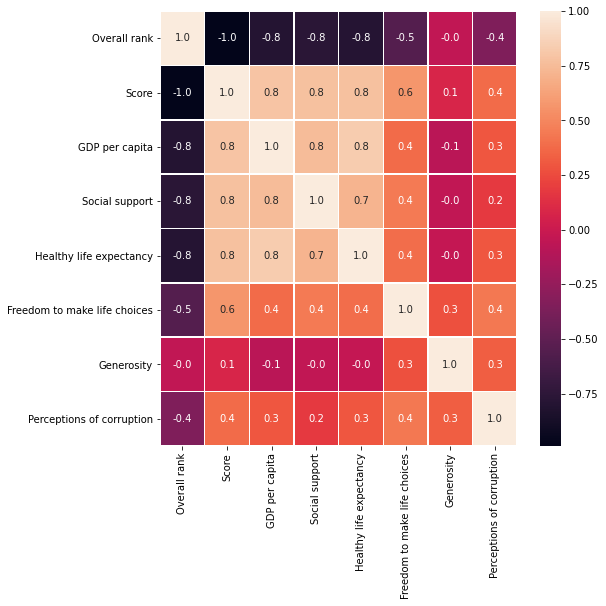

In [23]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

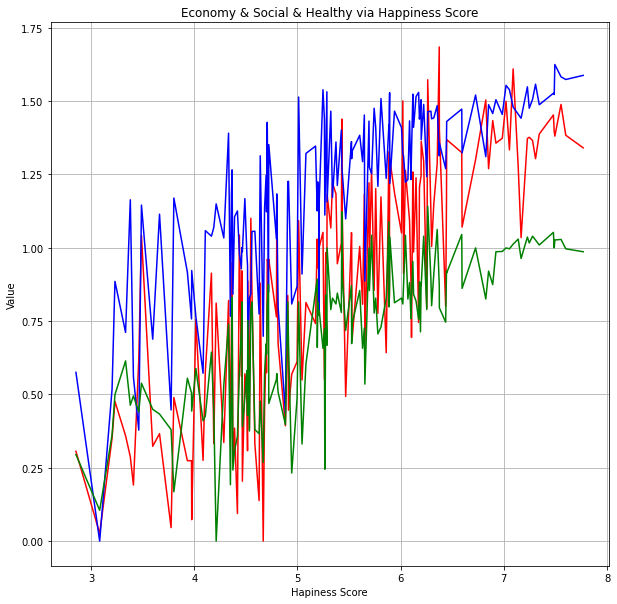

In [24]:
plt.plot(data["Score"], data["GDP per capita"], color="red")
plt.plot(data["Score"], data["Social support"], color="blue")
plt.plot(data["Score"], data["Healthy life expectancy"], color="green")
plt.grid()
plt.xlabel("Hapiness Score")
plt.ylabel("Value")
plt.title("Economy & Social & Healthy via Happiness Score")
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

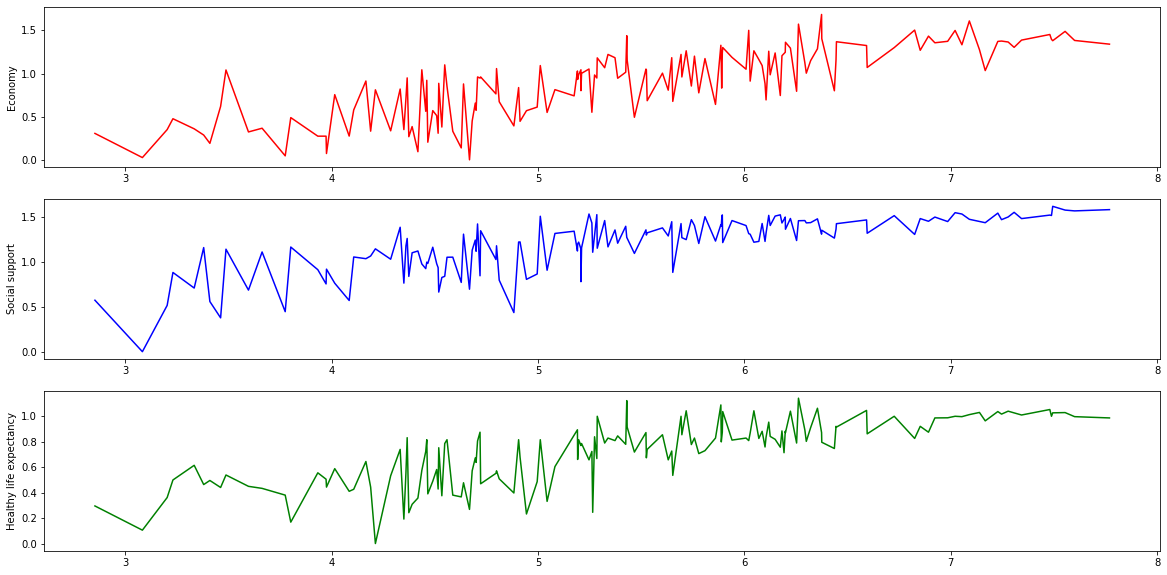

In [25]:
plt.subplot(3,1,1)
plt.plot(data["Score"], data["GDP per capita"], color="red")
plt.ylabel("Economy")

plt.subplot(3,1,2)
plt.plot(data["Score"], data["Social support"], color="blue")
plt.ylabel("Social support")

plt.subplot(3,1,3)
plt.plot(data["Score"], data["Healthy life expectancy"], color="green")
plt.ylabel("Healthy life expectancy")

plt.show() 

In [26]:
data["GDP rate"] = (data["GDP per capita"] > data["GDP per capita"].mean()).map({True: "Good", False: "Bad"})

data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP rate
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Good
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Good
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Good
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Good
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Good
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Bad
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Bad
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Bad
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Bad


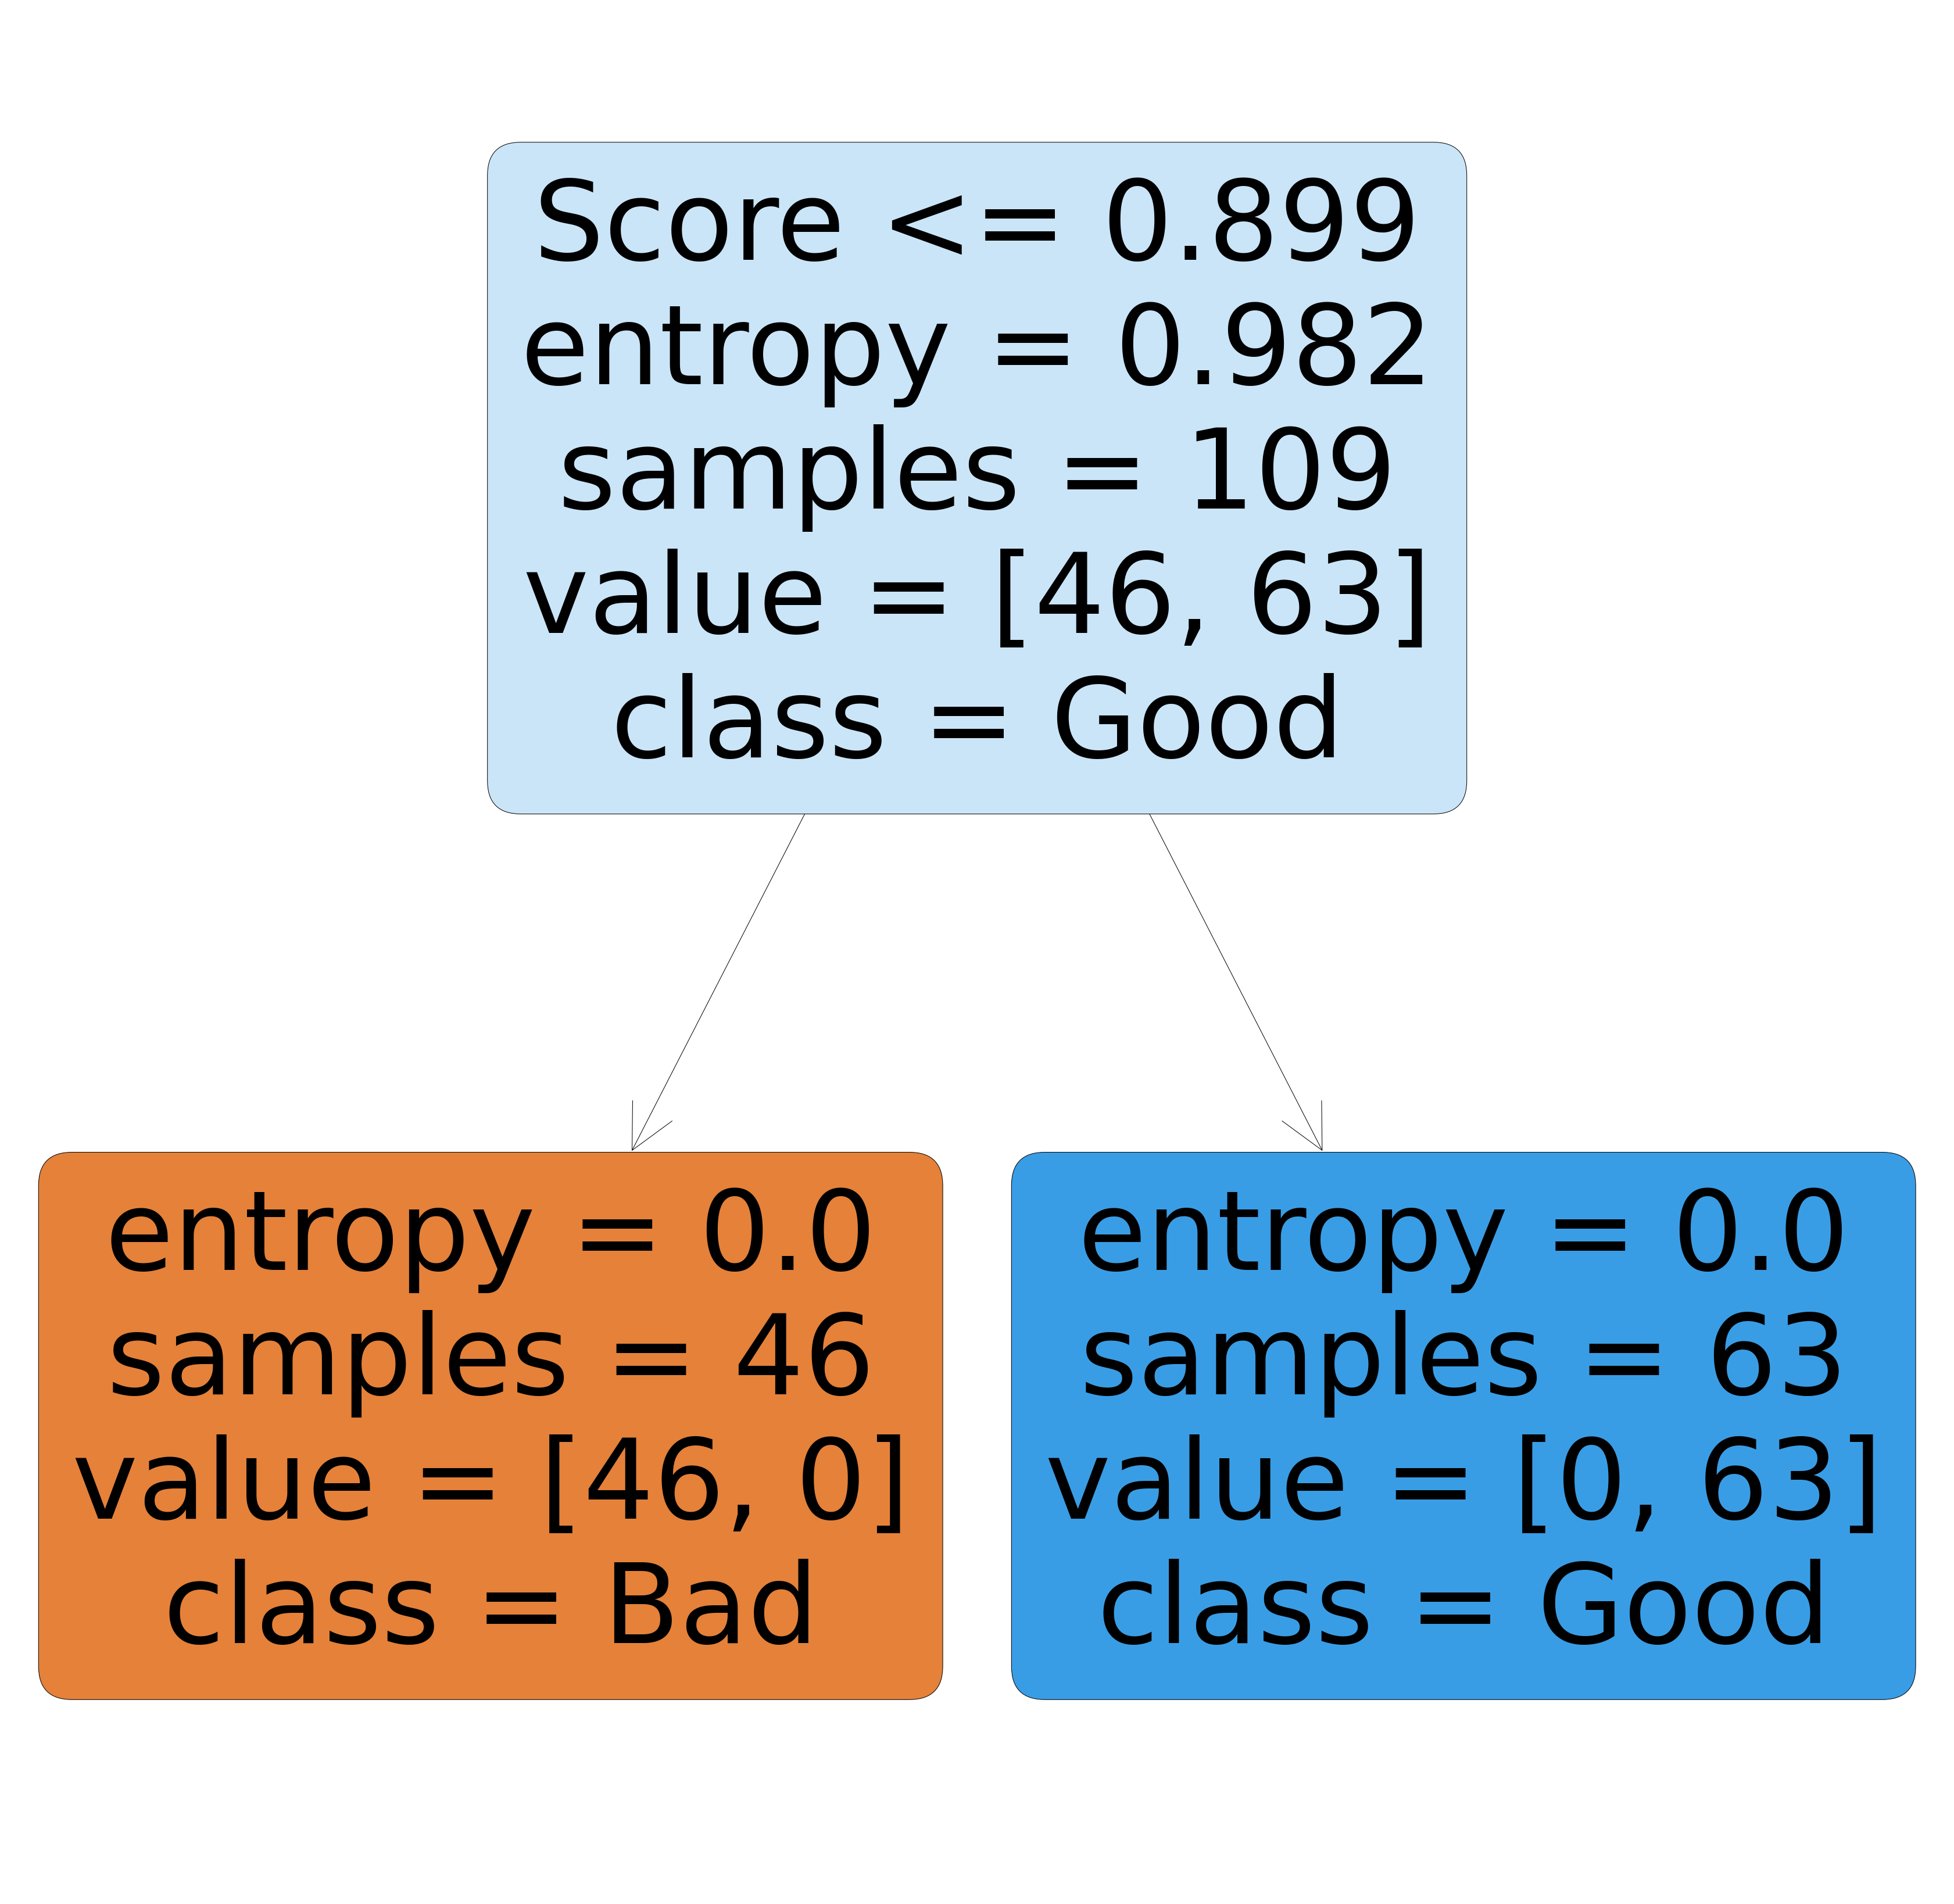

In [27]:
# Dividindo x e y
x = data.drop(columns=["Country or region","GDP rate"]).values 

y = data['GDP rate']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Treinando o modelo
model = DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(60, 60))
_ = plot_tree(model, 
              feature_names=data.columns[:-1],  
              class_names=model.classes_,
              filled=True, rounded = True, ax=ax)

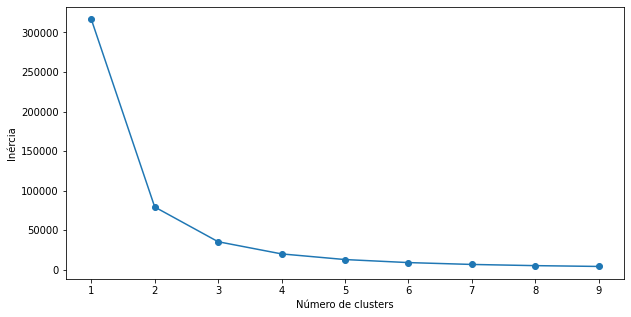

In [45]:
data_x = data.drop(columns=["GDP rate","Country or region"])
plt.rcParams['figure.figsize'] = (10, 5)

# Quantidade de clusters que serão testados
k = list(range(1, 10))
# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_x)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

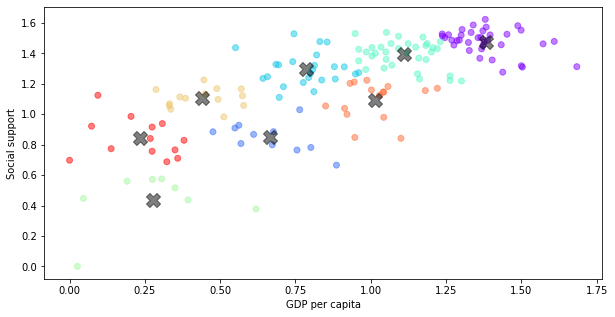

In [46]:
data_select = data[["GDP per capita","Social support"]]
data_select.head()

kmeans = KMeans(random_state=0).fit(data_select)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(data_select)


plt.scatter(data_select["GDP per capita"], data_select["Social support"], c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('GDP per capita')
plt.ylabel('Social support')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

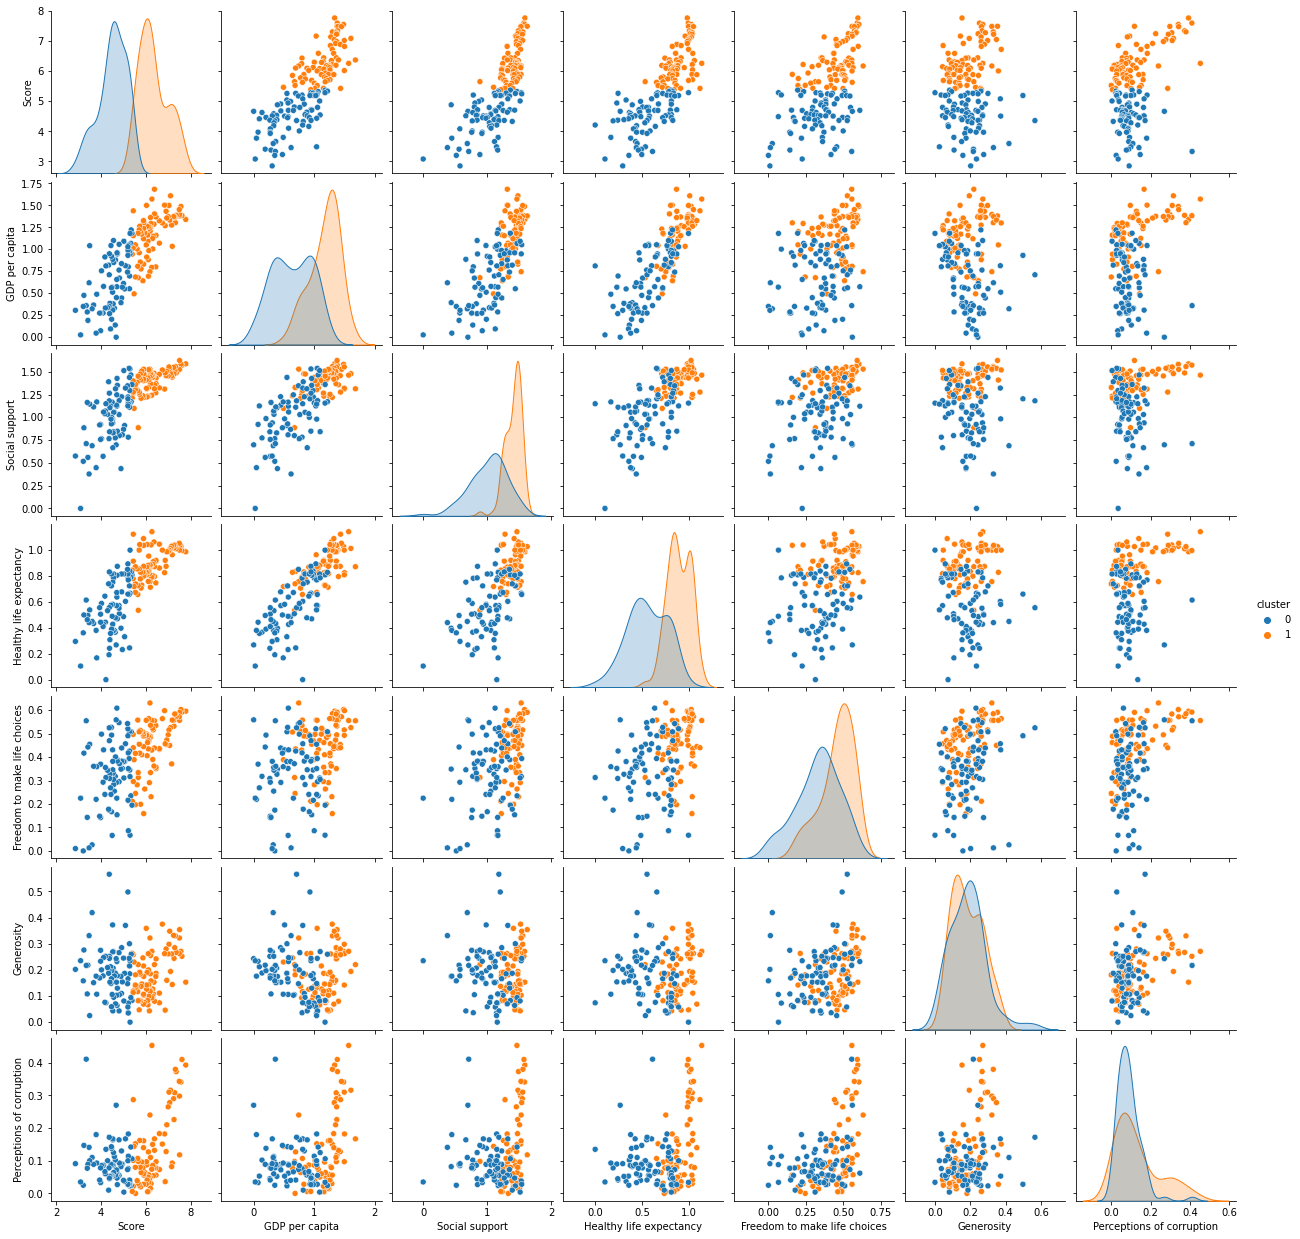

In [47]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data_x)
data_clustered = data_x.copy()
data_clustered['cluster'] = clusters
sns.pairplot(data_clustered[["Score","GDP per capita","Social support", "Healthy life expectancy","Freedom to make life choices", "Generosity","Perceptions of corruption", "cluster"]], 
             hue='cluster');